In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

sns.set()

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
df = pd.read_pickle('scores_models.pkl')

In [3]:
df.head()

,Random Forest,XGBoost,SVR linear,SVR rbf,SVR poly,Ridge,Linear Regression,Dummy,Decision Tree,Elastic Net
fit_time,"[5.001414060592651, 4.9881086349487305, 5.0324...","[0.782407283782959, 0.7863705158233643, 0.7896...","[2.08329439163208, 2.1691997051239014, 2.08483...","[0.3750948905944824, 0.36283016204833984, 0.36...","[0.3881561756134033, 0.37270474433898926, 0.37...","[0.006469011306762695, 0.006460428237915039, 0...","[0.00772547721862793, 0.007709980010986328, 0....","[0.005690336227416992, 0.005681514739990234, 0...","[0.08486723899841309, 0.08411169052124023, 0.0...","[0.0042345523834228516, 0.004307270050048828, ..."
score_time,"[0.033967018127441406, 0.03444719314575195, 0....","[0.008292675018310547, 0.008630514144897461, 0...","[0.01750922203063965, 0.017353296279907227, 0....","[0.04320359230041504, 0.04353618621826172, 0.0...","[0.042731285095214844, 0.04543662071228027, 0....","[0.00194549560546875, 0.0019519329071044922, 0...","[0.002052783966064453, 0.0020432472229003906, ...","[0.001955747604370117, 0.0019376277923583984, ...","[0.0021142959594726562, 0.0021300315856933594,...","[0.0018737316131591797, 0.001901865005493164, ..."
test_r2,"[0.9022135853506881, 0.8850249400372503, 0.885...","[0.9109436534803269, 0.9034861359058237, 0.908...","[0.6079067089221177, 0.5884600417688183, 0.566...","[0.8746614600497534, 0.8706985496223341, 0.865...","[0.8746614600497534, 0.8706985496223341, 0.865...","[0.6058951578716221, 0.597757709454421, 0.6025...","[0.6065552096506557, 0.5962957069714786, 0.602...","[-0.0007236001565424921, -0.000111914811038671...","[0.7953483481235023, 0.7790451700776221, 0.738...","[-1.037568349555523, -0.9216750502394746, -1.0..."
test_neg_mean_absolute_error,"[-0.03651928374511329, -0.038240533561247604, ...","[-0.03586389314453169, -0.037108049122857874, ...","[-0.09693317127347113, -0.09448130944155153, -...","[-0.0518851425854295, -0.05223406537905667, -0...","[-0.0518851425854295, -0.05223406537905667, -0...","[-0.09723158628864285, -0.09857544358181179, -...","[-0.09715104825993288, -0.09859660540081709, -...","[-0.16342592364576497, -0.1631358832256086, -0...","[-0.04994340498959163, -0.05238717497197636, -...","[-0.2379583753062442, -0.227689776116161, -0.2..."
test_neg_root_mean_squared_error,"[-0.06233769350164286, -0.06775322128562761, -...","[-0.059489991255579654, -0.0620758932723177, -...","[-0.12442174559262958, -0.1281002448590151, -0...","[-0.07057547072937627, -0.07185050487100873, -...","[-0.07057547072937627, -0.07185050487100873, -...","[-0.12514610958314545, -0.12672782769405513, -...","[-0.12504126752269656, -0.12695792328009578, -...","[-0.19941992050303006, -0.19982619856535866, -...","[-0.09018184062360937, -0.09392471276947836, -...","[-0.3334638272201432, -0.3287718233339223, -0...."


In [4]:
df.drop('Elastic Net', axis=1, inplace=True)

In [5]:
def prepare_data(df):
    df = df.reset_index()
    for column in df.columns:
        df = df.explode(column)
    df = pd.melt(df, id_vars='index')
    return df

def make_plots(df):
    unique = df['variable'].unique()
    palette = dict(zip(unique, sns.color_palette('husl',n_colors=len(unique))))       
    legend_elements = []
    for item in palette.items():
        legend_elements.append(Patch(facecolor=item[1], label=item[0]))   
    for param in df['index'].unique():
        df_param = df.loc[df['index']==param]
        df_param['value'] = df_param['value'].astype('float')
        order = df_param.groupby('variable').median().sort_values('value', ascending=False).index.tolist()

        fig, ax= plt.subplots(1,1, figsize=(10,6))
        sns.boxplot(data=df_param, x='variable', y='value', color='c', order=order, 
                    palette=palette, ax=ax)
        ax.set(title=param, xlabel='')
        ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
        ax.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()    

def plot_data(df, list_models=None):
    
    df = df.reset_index()
    for column in df.columns:
        df = df.explode(column)
    df = pd.melt(df, id_vars='index')

    if not list_models: 
        make_plots(df)
        
    else:        
        df = df.loc[~df['variable'].isin(list_models)]  
        make_plots(df)

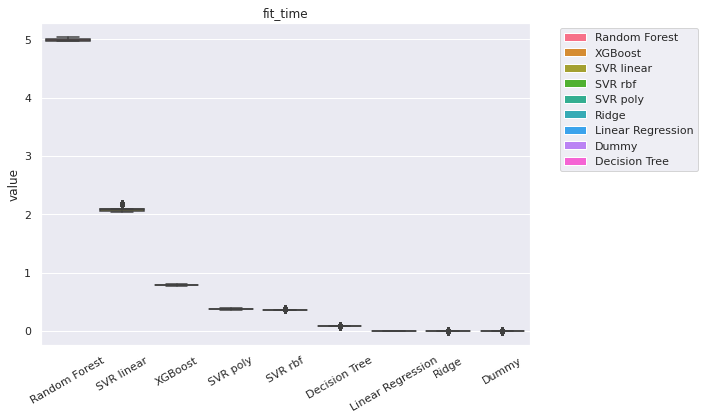

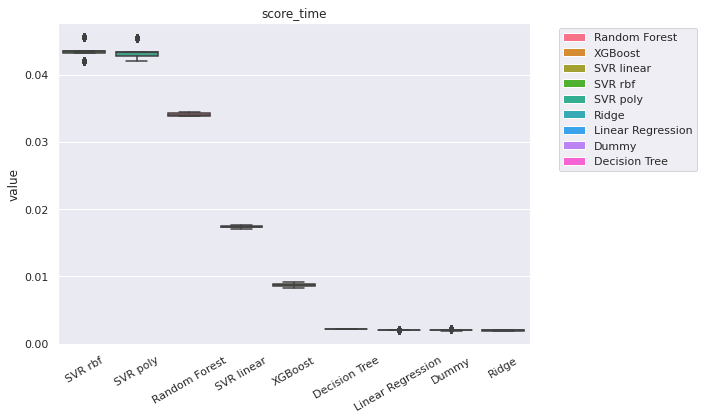

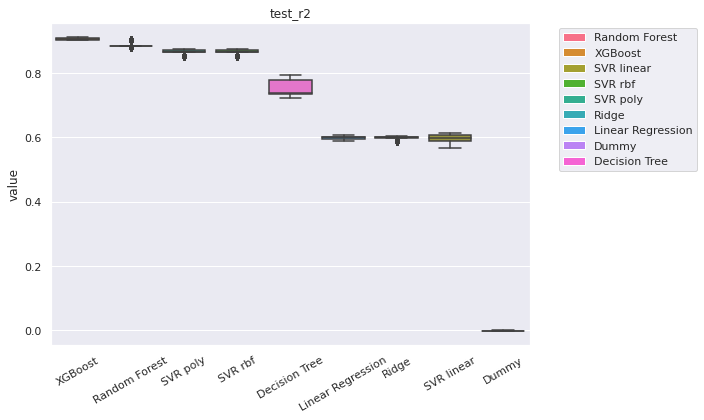

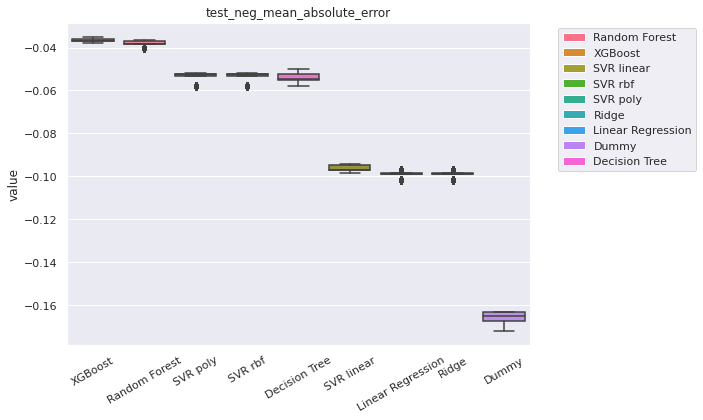

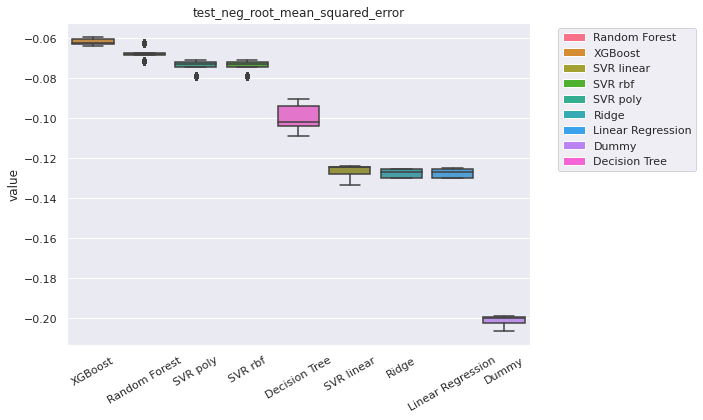

In [6]:
plot_data(df)

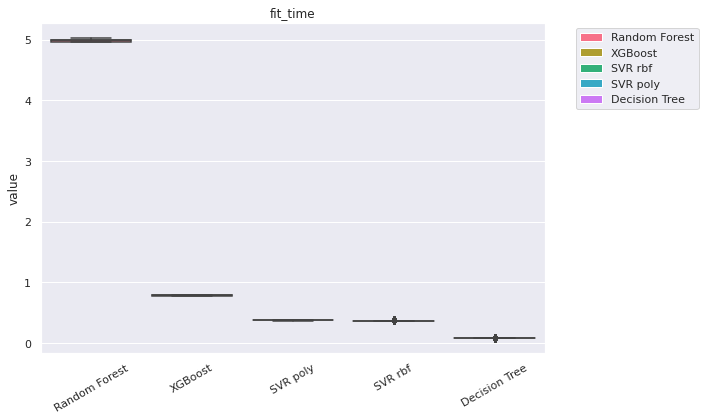

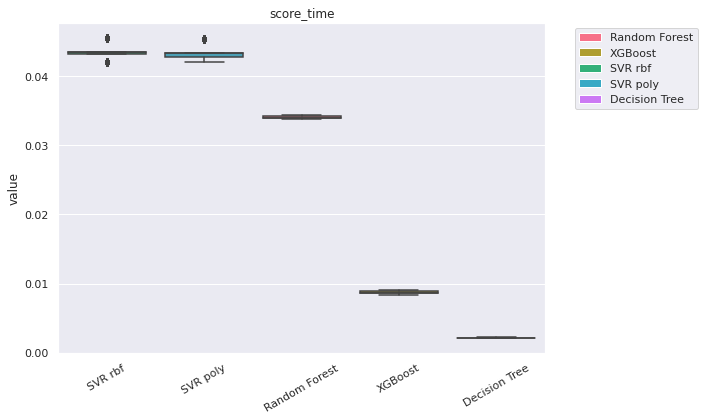

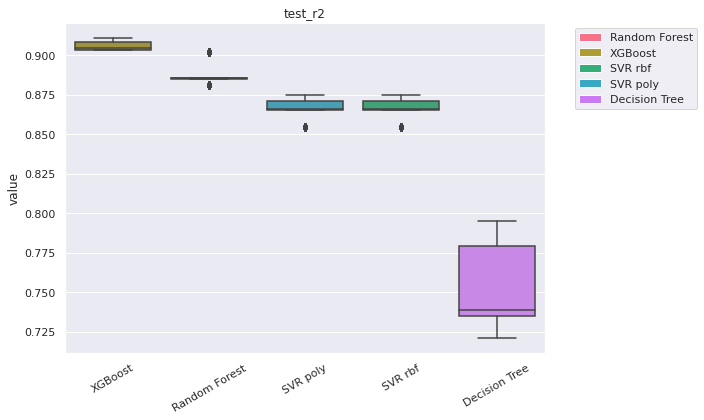

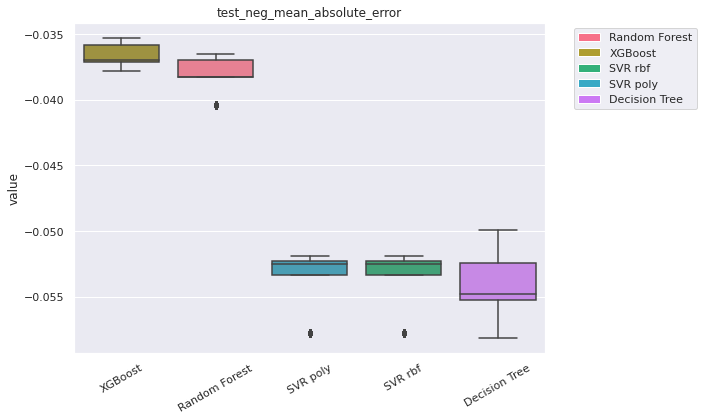

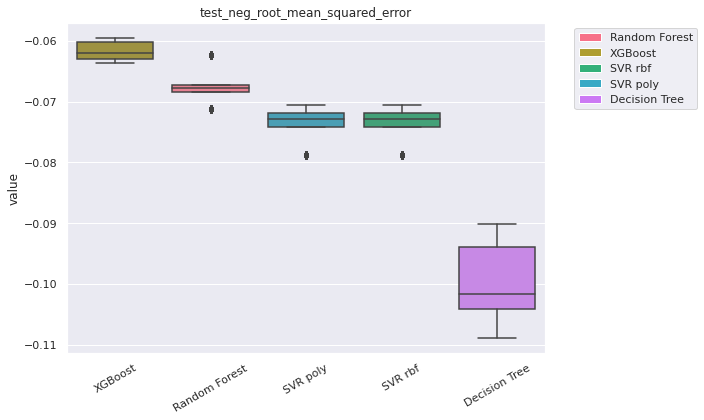

In [7]:
plot_data(df, ['Dummy', 'Ridge', 'Linear Regression', 'SVR linear'])